In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #Graphique map
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('creditcard.csv', sep = ';')

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 1. Exploraty Data analysis

## Objectif : 
- Exploration des données
- Analyser les relations entre les variables
- Réduction de dimention si necessaire, si possible

## Analyse descriptive

### Analyse de forme :

- **variable target :** Class
- **lignes, colonnes :** (284807, 31)
- **types de variables :** 30 float64, 1 int64
- **analyse des valeurs manquantes :** 0 Na

### Analyse de fond :

- **visualisation de la target :**Nous remarquons que les classes sont déséquilibrées. En effet, les données sur les fraudes sont sous-représentées (0,1%)


- **visualisation des features :** Toutes les variables sont anonymes et apparaissent standardisées en dehors du temps et du montant.
    
    Time :
    - max = 172792
    - min = 0
    - median = 84692
    - mean = 94813.86.
    
    
    Amount :
    - max = 25691.16
    - min = 0
    - median = 5.6
    - mean = 88
    

- **visualisation des features / target :** Some variables allows to delimit the two populations (V1 à V4; V9 à V12; V16 à V19)


- **analyse de corrélation linéaire:** Les corrélations entre les variables sont très faibles. Il n'est donc pas possible de réaliser une analyse en composante principale (ACP)

## Analyse descriptive

### Analyse de frome

In [4]:
dataset.shape

(284807, 31)

In [5]:
dataset.dtypes.value_counts()

float64    30
int64       1
dtype: int64

In [6]:
dataset.isna().sum(axis = 0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
features = dataset.copy()
del features['Class']
target = dataset.Class

In [8]:
features.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,...,1.766044e-12,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


### Analyse de fond

#### Visualisation des features

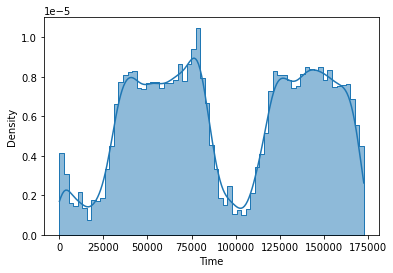

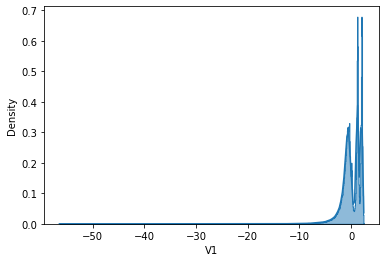

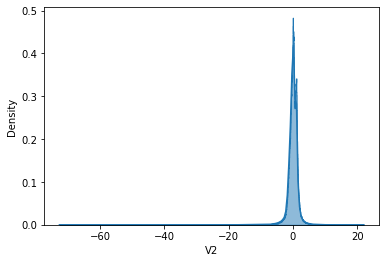

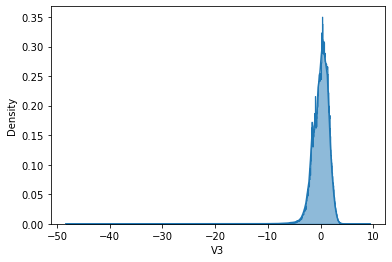

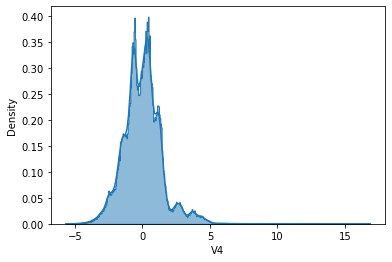

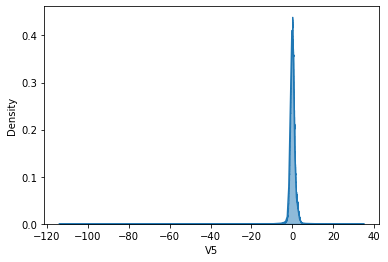

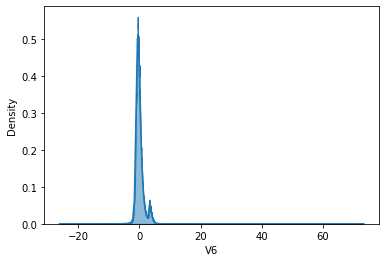

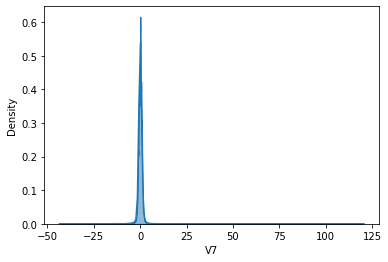

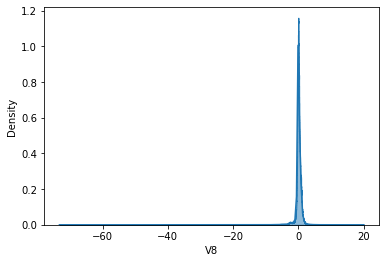

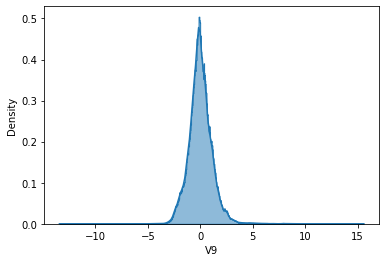

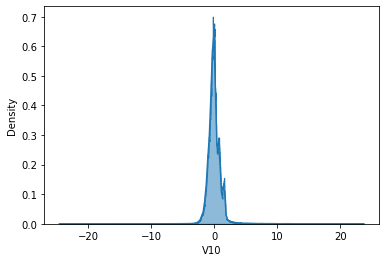

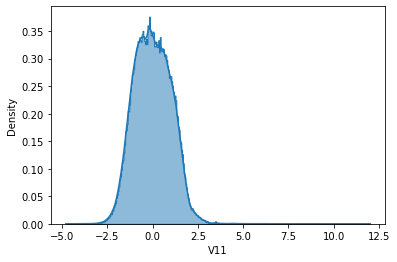

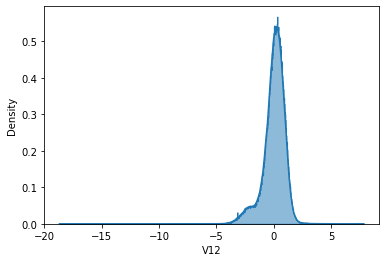

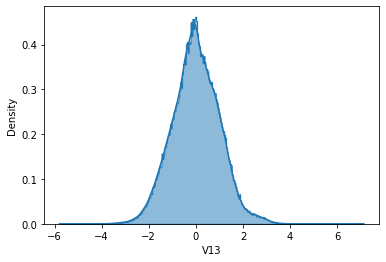

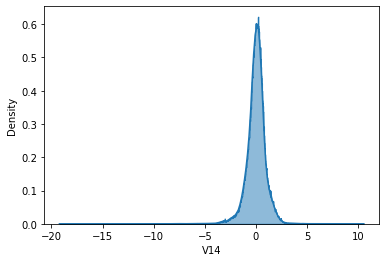

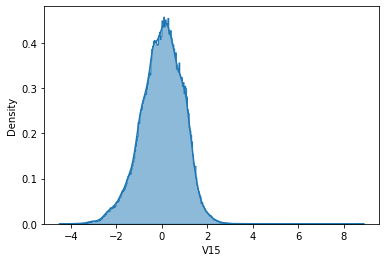

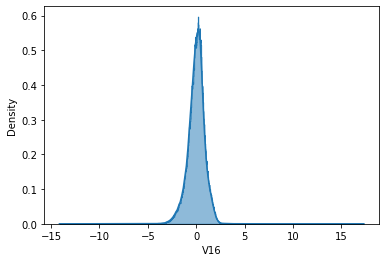

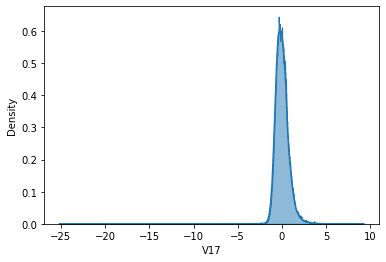

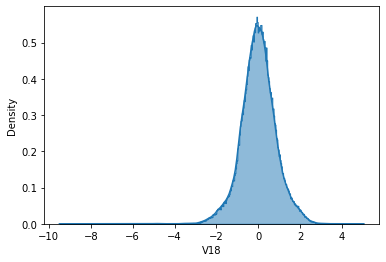

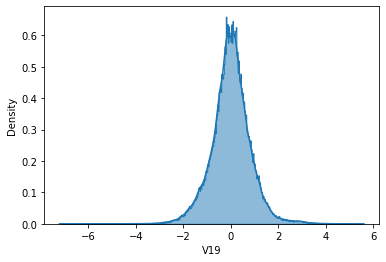

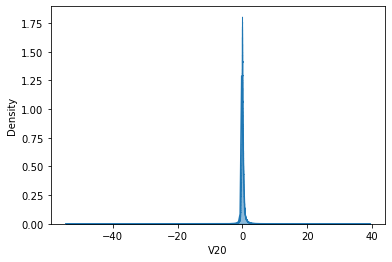

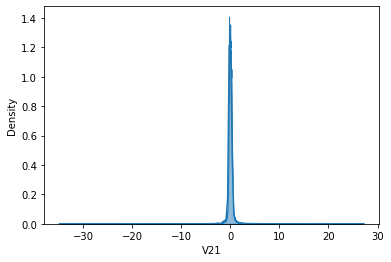

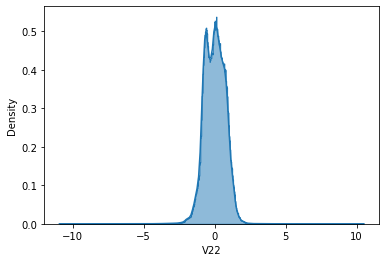

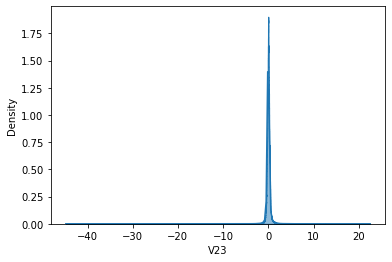

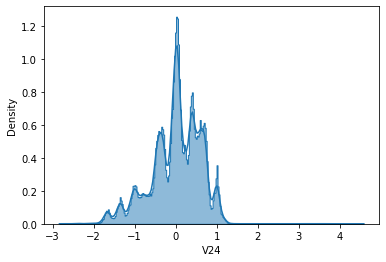

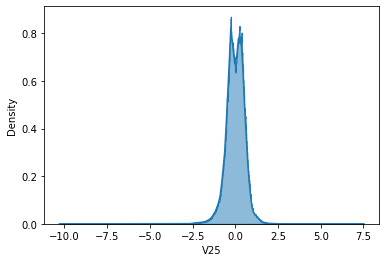

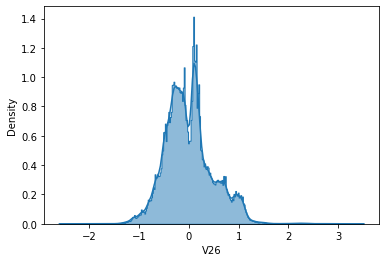

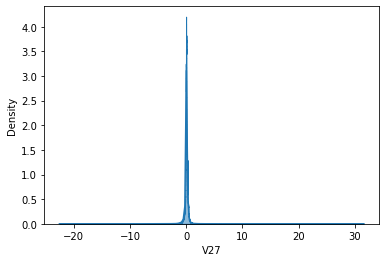

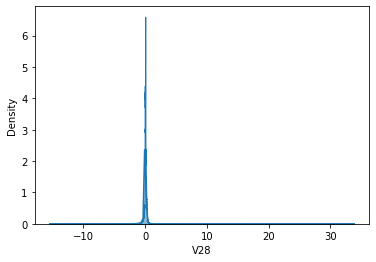

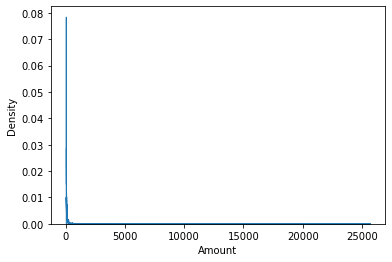

In [9]:
## Fonction de traçages de plusieurs histogrammes : 14
for col in dataset.select_dtypes('float'):
    sns.histplot(dataset[col], kde=True, stat="density", element="step")
    plt.show()

In [9]:
dataset.Class.value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

#### features vs target

In [10]:
frausdter = features[target == 1]
No_frausdter = features[target == 0]

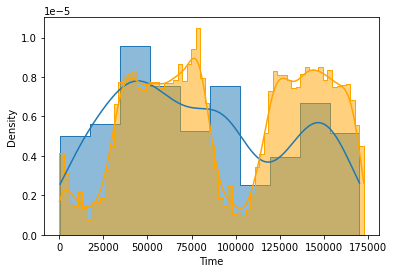

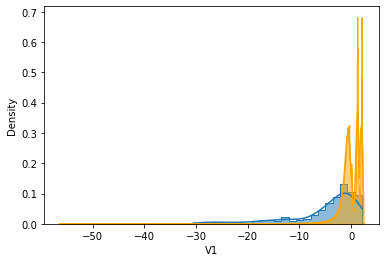

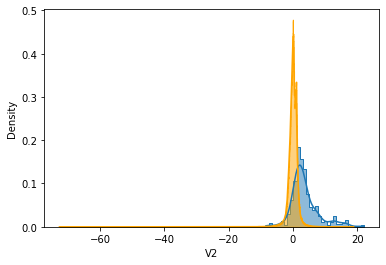

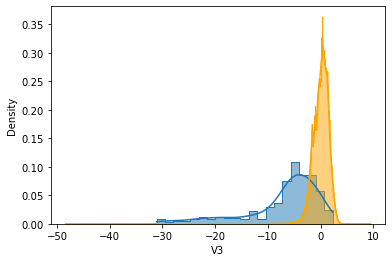

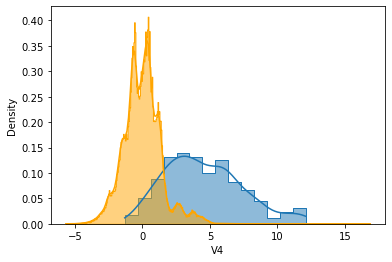

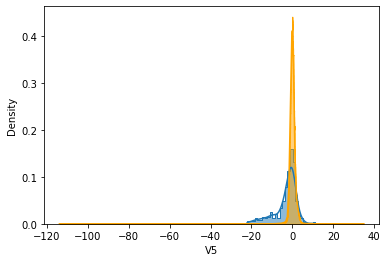

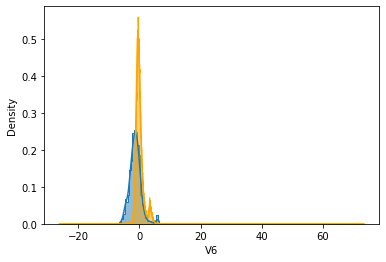

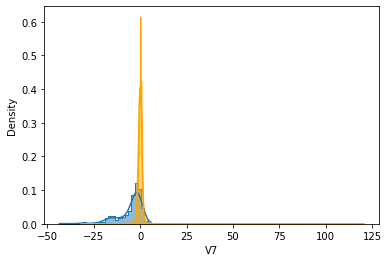

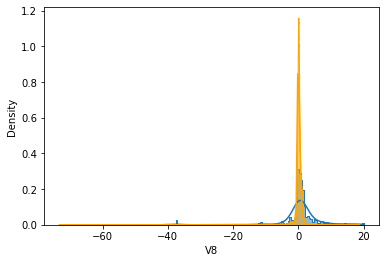

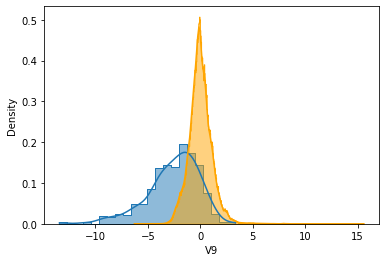

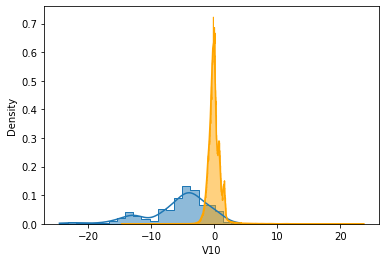

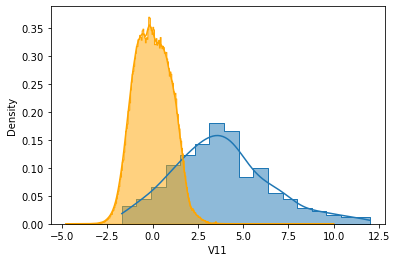

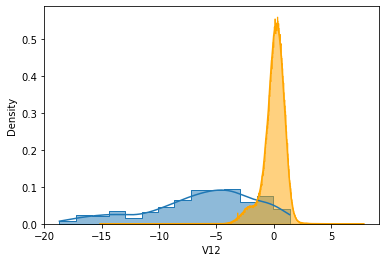

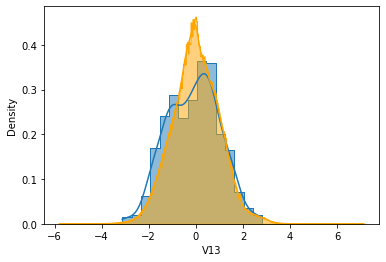

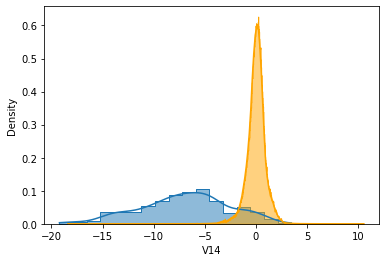

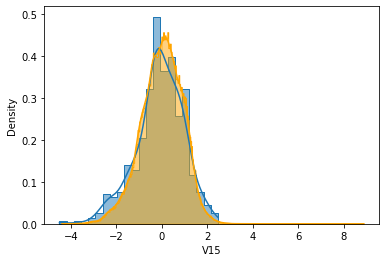

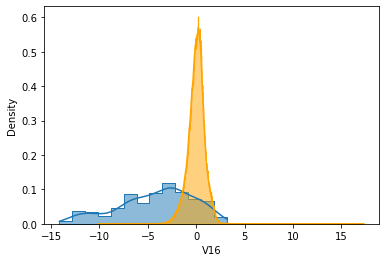

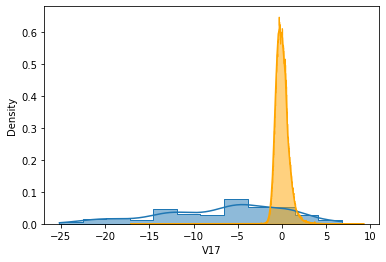

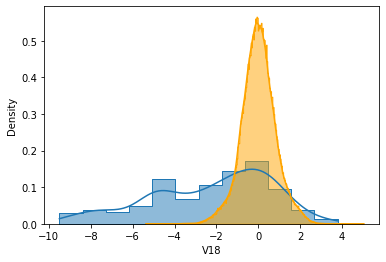

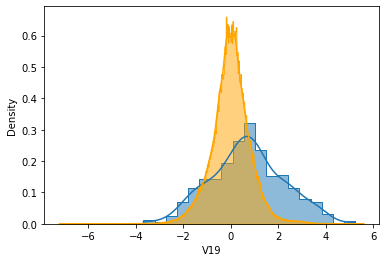

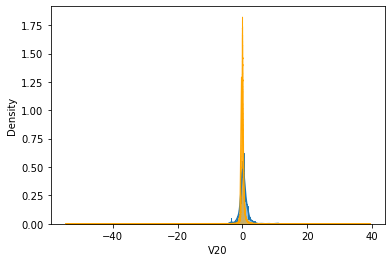

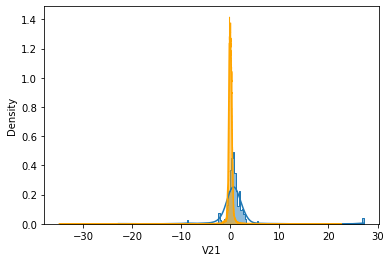

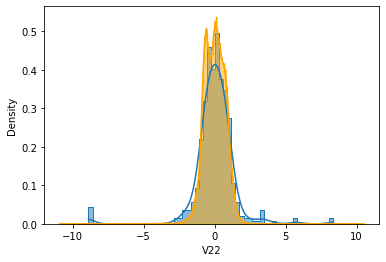

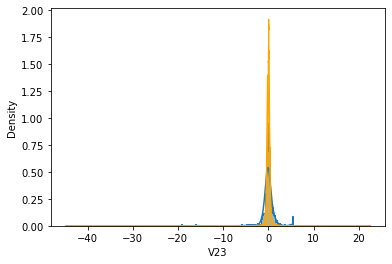

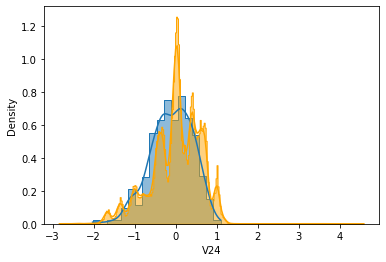

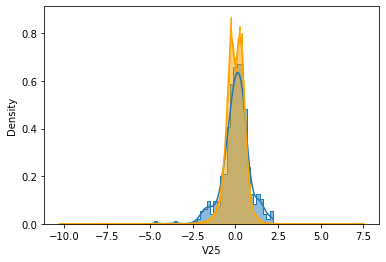

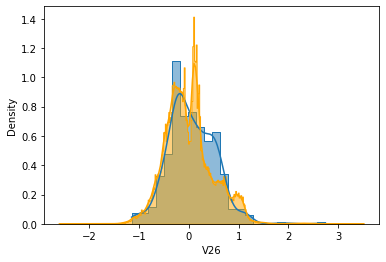

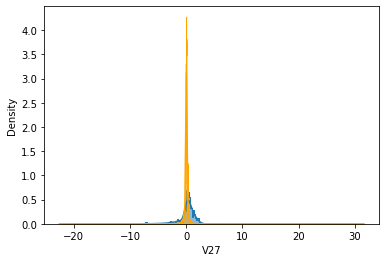

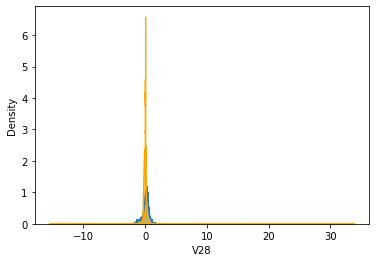

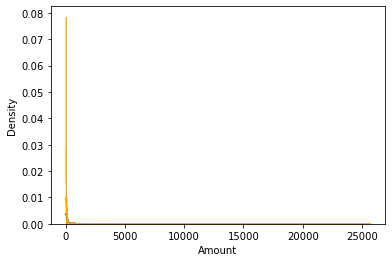

In [12]:
for col in dataset.select_dtypes('float'):
    sns.histplot(frausdter[col], stat="density", label ='frausdter', element="step", kde=True)
    sns.histplot(No_frausdter[col], stat="density", label = 'No_frausdter',  element="step", kde=True, color = 'orange')
    plt.show()

#### features vs features

All variables are quantitatives, we will apply a PCA if they are correled each other.
The variables aren't correled each other, it isn't necessary to do a PCA on the data.
We will keep all variables.

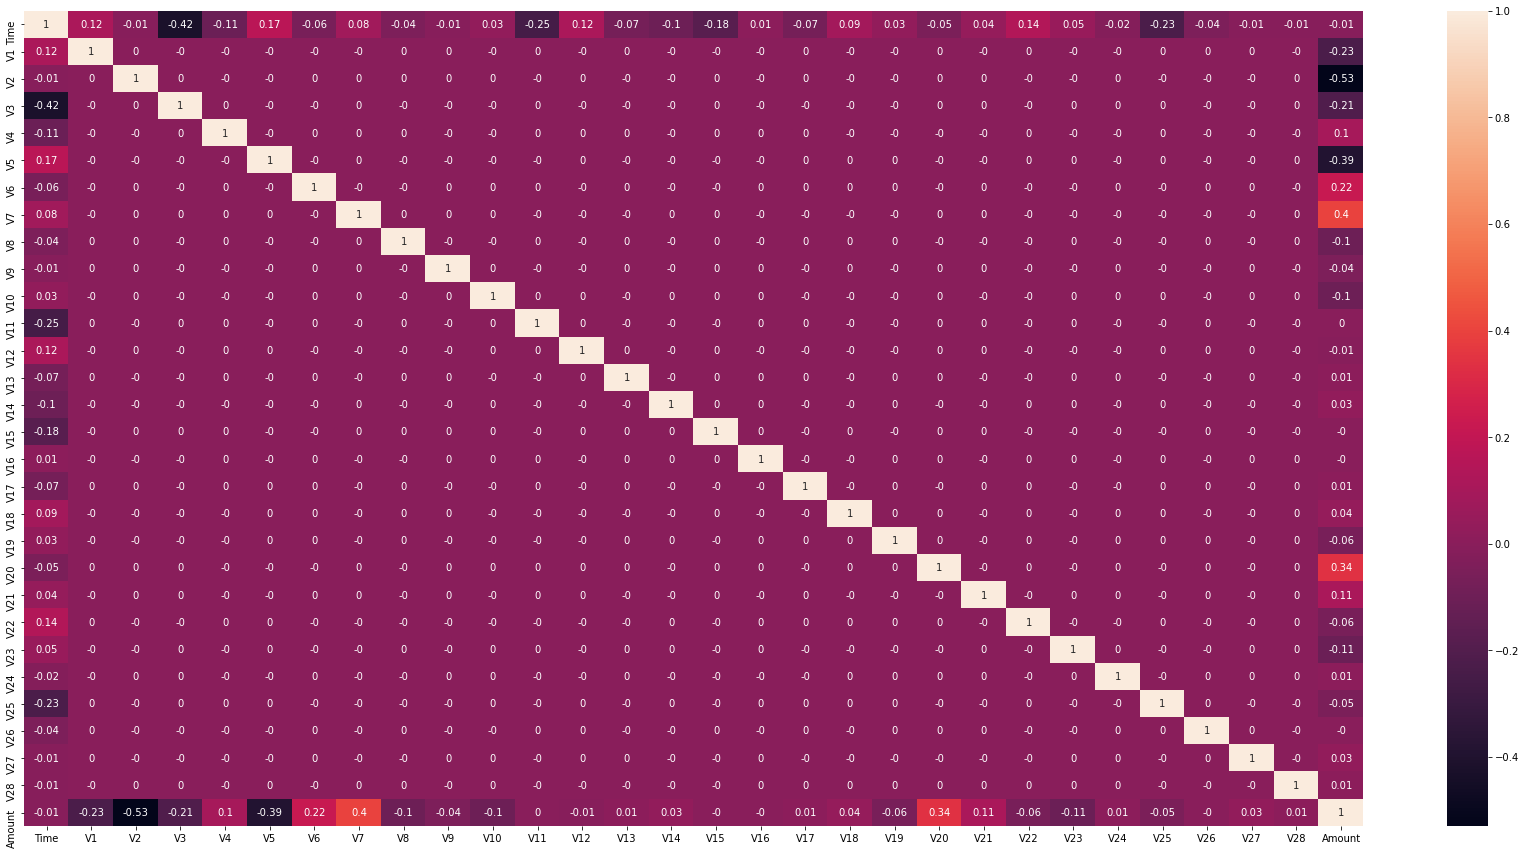

In [13]:
plt.figure(figsize=(30, 15))
sns.heatmap(round(features.corr(),2), annot=True)
plt.show()

# 2. Data modelisation

## Objectifs : 
- Préparer les données à la modélisation
- Développer une pemière stratégie de modélisation
- Choisir le modèle le plus performant entre plusieurs
- Optmiser les paramètres recall >= 83% et f1_score >=86%


## Preprocessing

- **data_train, data_test :** 80%, 20%
- **Time and Amount :** standardiser ces deux variables (skleran.preprocessing import StandardScaler)

## Modélisation

### Première stratégie
- **Arbre de régression :** La courbe du train_score indique un oversampling. Cela peut entaîner des problèmes de généralisation du modèle sur des nouvelles données. Les données étant unbanlanced (déséquilibré), nous utiliserons StratifiedKFold comme méthode de validation croisée. (sklearn.model_selection import StratifiedKFold).

    - recall = 0.8
    
    - f1_score = 0.77
 
On peut essayer de résoudre ce problème en faisant une sélection de variables. L'analyse descriptive indiquait une différence de distribution entre les fraudeurs et les non fraudeurs. On peut donc baser notre critère de sélection sur les résultats d'un test anova. (skleran.features_selection import SelectKBest, f_classif).

Quelques soit le nombre de variables sélectionnés (graphique 2), le modèle reste en oversampling. Nous utilisons donc d'autres modèles.

### Seconde stratégie
- **Random Forest :** La courbe du train_score indique un overfitting. Cela peut entaîner des problèmes de généralisation du modèle sur des nouvelles données. Les données étant unbanlanced (déséquilibré), nous utiliserons StratifiedKFold comme méthode de validation croisée. (sklearn.model_selection import StratifiedKFold).

    - recall = 0.78
    
    - f1_score = 0.84
 
On peut essayer de résoudre ce problème en faisant une sélection de variables. L'analyse descriptive indiquait une différence de distribution entre les fraudeurs et les non fraudeurs. On peut donc baser notre critère de sélection sur les résultats d'un test anova. (skleran.features_selection import SelectKBest, f_classif).

Quelques soit le nombre de variables sélectionnés (graphique 2), le modèle reste en overfitting. Nous utilisons donc d'autres modèles.




## Preprocessing

### Train_Test, standardisation

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
data_train, data_test = train_test_split(dataset, train_size = 0.8, random_state = 0)

In [13]:
data_name = {'train' : data_train, 
             'test' : data_test}
for name, data in data_name.items() :
    print(f'{name} : {round((data.shape[0]/dataset.shape[0])*100, 3)}%')
    print(data.Class.value_counts(normalize = True))
    print('---------------------------------------------')

train : 80.0%
0    0.998284
1    0.001716
Name: Class, dtype: float64
---------------------------------------------
test : 20.0%
0    0.998227
1    0.001773
Name: Class, dtype: float64
---------------------------------------------


In [14]:
def preprocessing(dataset):
    scaler = StandardScaler()
    data = dataset.copy()
    data.Time = scaler.fit_transform(np.array(dataset.Time).reshape(dataset.Time.shape[0],1))
    data.Amount = scaler.fit_transform(np.array(dataset.Amount).reshape(dataset.Time.shape[0],1))
    X = data.drop('Class', axis = 1)
    y = data.Class
    return X, y

In [15]:
X_train, y_train = preprocessing(data_train)
X_test, y_test = preprocessing(data_test)

In [16]:
X_train.Amount.describe()

count    2.278450e+05
mean     4.258263e-17
std      1.000002e+00
min     -3.573262e-01
25%     -3.343861e-01
50%     -2.686298e-01
75%     -4.446995e-02
max      7.889097e+01
Name: Amount, dtype: float64

In [17]:
X_train.Time.describe()

count    2.278450e+05
mean    -1.429975e-16
std      1.000002e+00
min     -1.996443e+00
25%     -8.553628e-01
50%     -2.125288e-01
75%      9.369305e-01
max      1.641237e+00
Name: Time, dtype: float64

# Modélisation

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve, cross_val_score, validation_curve, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import parallel_backend, register_parallel_backend
from sklearn.pipeline import make_pipeline

In [19]:
cv = StratifiedKFold(4)

## Procédure d'évaluation

In [20]:
def evaluation(model) : 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    with parallel_backend(backend = 'loky', n_jobs=-1):
        N, train_score, val_score = learning_curve(model, X_train, y_train, cv = cv, scoring = 'f1',
                                                      train_sizes = np.linspace(0.1, 1, 10))
    
        
    
    plt.figure(figsize = (12,8))
    plt.plot(N, train_score.mean(axis = 1), label = 'train_score')
    plt.plot(N, val_score.mean(axis = 1), label = 'validation score')
    plt.legend()

## Arbre de décision

[[56833    28]
 [   20    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.74      0.80      0.77       101

    accuracy                           1.00     56962
   macro avg       0.87      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962



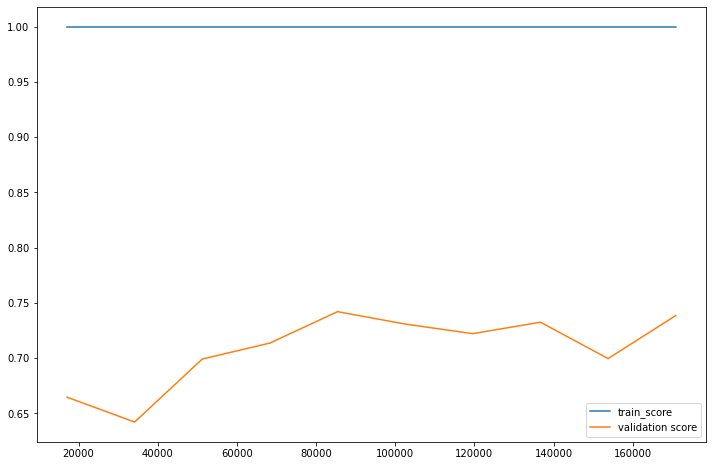

In [24]:
Tree_model = make_pipeline(DecisionTreeClassifier(random_state = 0))
evaluation(Tree_model)

In [25]:
Tree_model_2 = make_pipeline(SelectKBest(f_classif, k = 1), Tree_model)
Tree_model_2

Pipeline(steps=[('selectkbest', SelectKBest(k=1)),
                ('pipeline',
                 Pipeline(steps=[('decisiontreeclassifier',
                                  DecisionTreeClassifier(random_state=0))]))])

In [26]:
k = list(np.arange(1, 31))
train_score, val_score = validation_curve(Tree_model_2, X_train, y_train, param_name = 'selectkbest__k', 
                                          param_range = k, cv = cv, scoring = 'f1')

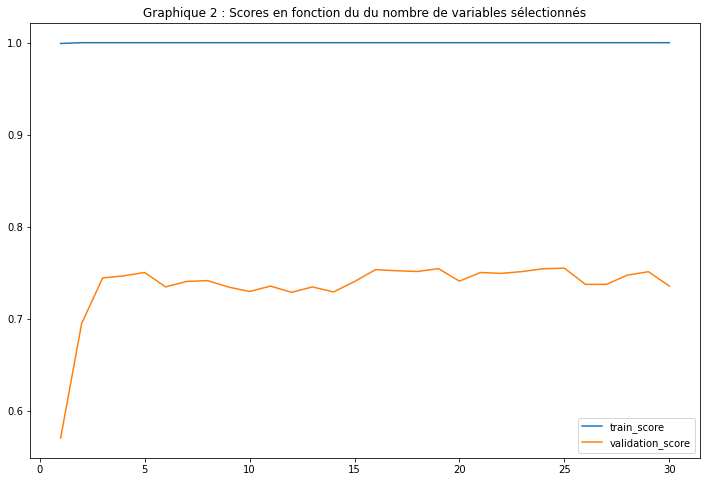

In [27]:
plt.figure(figsize= (12,8))
plt.plot(k, train_score.mean(axis = 1), label = 'train_score')
plt.plot(k, val_score.mean(axis = 1), label = 'validation_score')
plt.legend()
plt.title('Graphique 2 : Scores en fonction du du nombre de variables sélectionnés')
plt.show()

## Random Forest

In [28]:
model_RDF = make_pipeline(RandomForestClassifier(random_state = 0))

[[56854     7]
 [   22    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.78      0.84       101

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



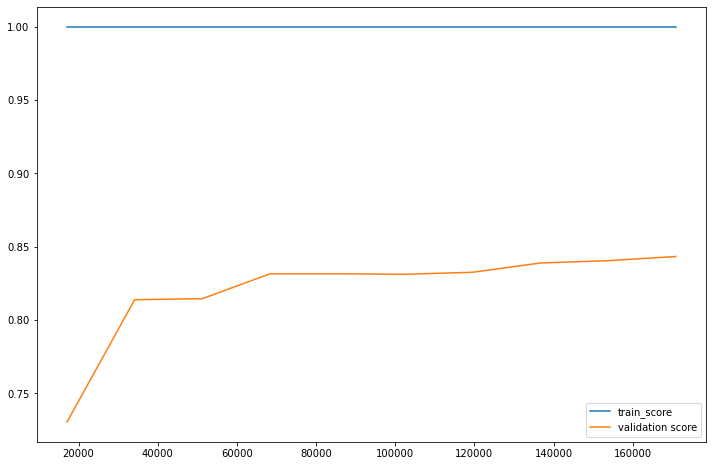

In [29]:
evaluation(model_RDF)

In [30]:
model_RDF

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])

# Optimisation du modèle

In [21]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [22]:
AdaBoost = make_pipeline(AdaBoostClassifier(random_state = 0))
KNeighbors = make_pipeline(KNeighborsClassifier())
SVC_model = make_pipeline(SVC(random_state = 0, gamma='auto'))

In [23]:
list_of_models = {
    "AdaBoost" : AdaBoost, 
    "KNeighbors" : KNeighbors, 
    "SVC_model" : SVC_model
}

In [ ]:
for name, model in list_of_models.items() :
    print(name)
    evaluation(model)

AdaBoost
[[56848    13]
 [   32    69]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.84      0.68      0.75       101

    accuracy                           1.00     56962
   macro avg       0.92      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962

KNeighbors


# Optimisation

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

In [ ]:
KNeighbors = KNeighborsClassifier()
KNeighbors

In [ ]:
hyper_params_KNN = {
    'n_neighbors' : np.arange(5, 12)
}

In [ ]:
grid_KNN = GridSearchCV(KNeighbors, hyper_params_KNN, scoring = 'recall', cv = cv)

In [ ]:
with parallel_backend('loky', n_jobs=2):
    grid_KNN.fit(X_train, y_train)
    
print(grid_KNN.best_params_)

In [ ]:
y_pred_KNN  = grid_KNN.predict(X_test)
print(classification_report(y_test, y_pred_KNN))

## Precision Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precision, recall, threshold = precision_recall_curve(y_test, grid_KNN.best_estimator_.decision_function(X_test))

In [ ]:
plt.plot(threshold, precision[:-1], label = 'precision')
plt.plot(threshold, recall[:-1], label = 'recall')
plt.legend()